This project will be mainly about inferential statistics, especially some of the most commonly used dtatistical methods. We will also deal with pandas and web data importing. This project will be about wine preferences

## Download and Inspect the Data

In [1]:
# Set up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Print a list of unique values per column
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data["pH"].head()

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [6]:
# Automatically sorted
np.unique(data["pH"])

array([2.74, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.92, 2.93, 2.94, 2.95, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 ,
       3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31,
       3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42,
       3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53,
       3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61, 3.62, 3.63, 3.66,
       3.67, 3.68, 3.69, 3.7 , 3.71, 3.72, 3.74, 3.75, 3.78, 3.85, 3.9 ,
       4.01])

In [7]:
len(np.unique(data["pH"]))

89

In [8]:
# To get the column names and their unique values
for i in data.keys():
    print(f"Column {i} has {len(np.unique(data[i]))} unique values.")

Column fixed acidity has 96 unique values.
Column volatile acidity has 143 unique values.
Column citric acid has 80 unique values.
Column residual sugar has 91 unique values.
Column chlorides has 153 unique values.
Column free sulfur dioxide has 60 unique values.
Column total sulfur dioxide has 144 unique values.
Column density has 436 unique values.
Column pH has 89 unique values.
Column sulphates has 96 unique values.
Column alcohol has 65 unique values.
Column quality has 6 unique values.


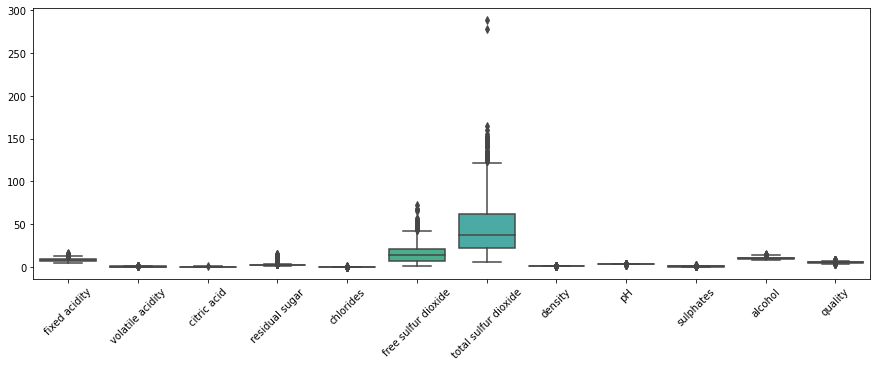

In [9]:
fig,ax = plt.subplots(1, figsize = (15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [10]:
# Remove the outliers of sulphur dioxide
data = data[ data["total sulfur dioxide"] < 200]

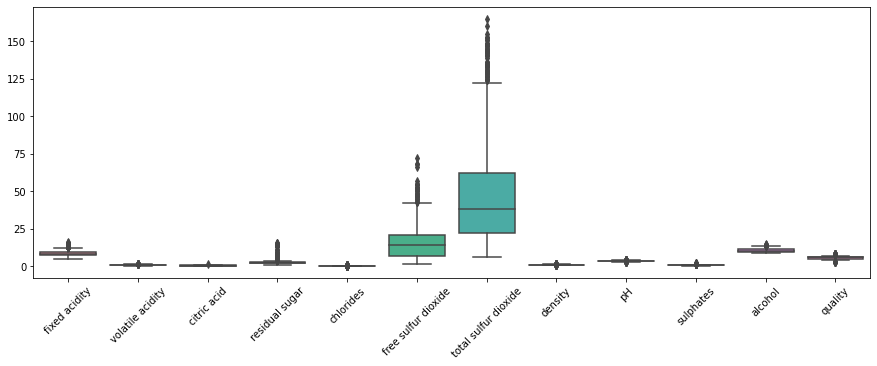

In [11]:
fig,ax = plt.subplots(1, figsize = (15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

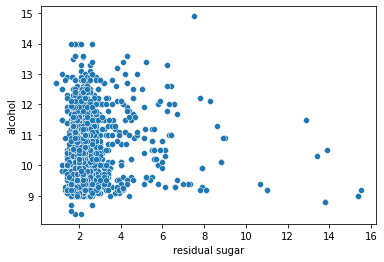

In [12]:
# Visual Data Exploration
sns.scatterplot(x = data["residual sugar"], y = data["alcohol"]);

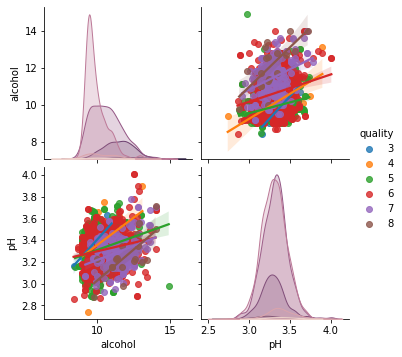

In [13]:
# Pairplot
sns.pairplot(data[["alcohol", "pH", "quality"]], kind = "reg", hue = "quality")
plt.show()

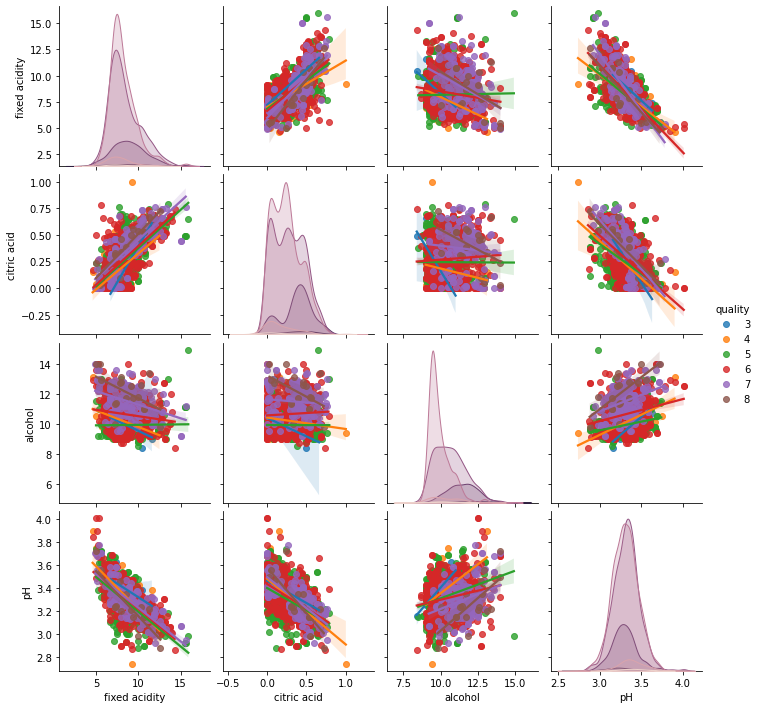

In [14]:
# Pairplot
cols2plot = ["fixed acidity", "citric acid", "alcohol", "pH", "quality"]
sns.pairplot(data[cols2plot], kind = "reg", hue = "quality")
plt.show()

## T-Test for Acidity of Wine

In [15]:
import scipy.stats as stats

In [16]:
# Is there any significant difference in volatile acidity 
# between data quality 3 and 8
# Extract the data for volatile aciduty 3 and 8
x = data["volatile acidity"][data["quality"] == 3]
y = data["volatile acidity"][data["quality"] == 8]
print(len(x))
print(len(y))

10
18


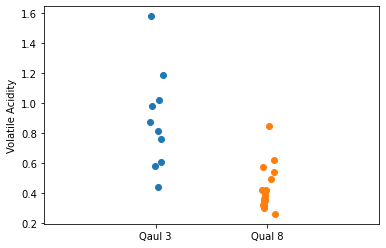

In [17]:
plt.plot(np.random.randn(len(x))/30, x, "o",
        np.random.randn(len(y))/30 +1, y, "o")
plt.xlim([-1,2])
plt.xticks([0,1], labels = ["Qaul 3", "Qual 8"])
plt.ylabel("Volatile Acidity")
plt.show()

In [18]:
# t-test
ttest = stats.ttest_ind(x,y) # independent t-test
print(ttest)

Ttest_indResult(statistic=5.141735208056272, pvalue=2.3127479460333114e-05)


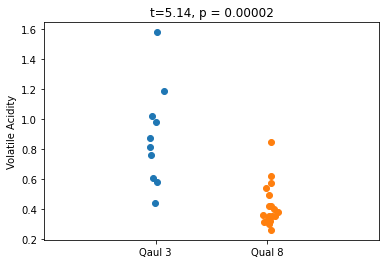

In [19]:
plt.plot(np.random.randn(len(x))/30, x, "o",
        np.random.randn(len(y))/30 +1, y, "o")
plt.xlim([-1,2])
plt.xticks([0,1], labels = ["Qaul 3", "Qual 8"])
plt.ylabel("Volatile Acidity")
plt.title(f"t={ttest[0]:0.2f}, p = {ttest[1]:0.5f}")
plt.show()

In [20]:
# Make a histogram for the number of times quality tests are in data
# Longer Version
qualcounts = np.zeros(6)
n = 0
for i in range(3,9):
    qualcounts[n] = len(data[data["quality"] == i])
    n += 1
qualcounts

array([ 10.,  53., 681., 638., 197.,  18.])

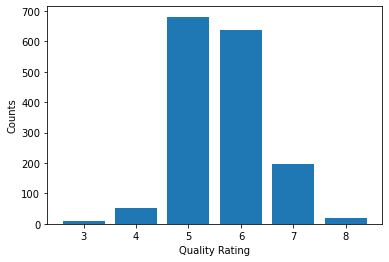

In [21]:
plt.bar(range(3,9), qualcounts)
plt.xlabel("Quality Rating")
plt.ylabel("Counts");

In [22]:
# A simple way
counts = data["quality"].value_counts()
counts

5    681
6    638
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

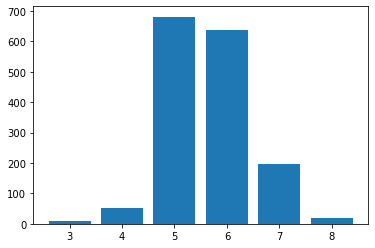

In [23]:
plt.bar(list(counts.keys()), counts);

In [24]:
# Group together quality 3&4 and quality 7&8
x = data["volatile acidity"][(data["quality"] ==3) | (data["quality"] ==4)]
y = data["volatile acidity"][(data["quality"] ==7) | (data["quality"] ==8)]
print(len(x))
print(len(y))

63
215


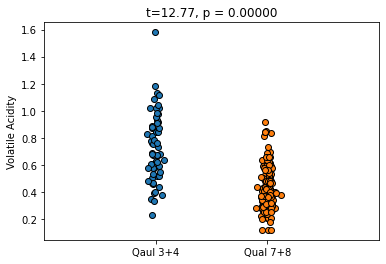

In [25]:
ttest = stats.ttest_ind(x,y) # independent t-test
plt.plot(np.random.randn(len(x))/30, x, "o",
        np.random.randn(len(y))/30 +1, y, "o",
        markeredgecolor = "k")
plt.xlim([-1,2])
plt.xticks([0,1], labels = ["Qaul 3+4", "Qual 7+8"])
plt.ylabel("Volatile Acidity")
plt.title(f"t={ttest[0]:0.2f}, p = {ttest[1]:0.5f}")
plt.show()

## Multiple Regression

In this model we will use all the features to predict the quality of wine. We will use stast module API because it provides us with a very nice summary table.

Make two pandas dataframes, one for dependent and another for independent variables.

In [26]:
import statsmodels.api as sm

In [27]:
dep_var = data["quality"]
ind_vars = data.drop(labels = "quality", axis = 1)
ind_vars.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [28]:
model = sm.OLS(dep_var, ind_vars).fit()
model

In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):                        0.00
Time:                        03:11:22   Log-Likelihood:                         -1564.8
No. Observations:                1597   AIC:                                      3152.
Df Residuals:                    1586   BIC:                                      3211.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [30]:
# Add a constant for calculating the intercept
ind_vars = sm.add_constant(ind_vars)
model = sm.OLS(dep_var, ind_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          1.30e-145
Time:                        03:11:22   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

/Users/sheraji/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# Print a list of significant variables only (p < 0.05)
# Access p-values columns
model.pvalues < 0.05

const                   False
fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                 False
pH                       True
sulphates                True
alcohol                  True
dtype: bool

In [32]:
sig_cols = list(model.pvalues[model.pvalues < 0.05].keys())
sig_cols

['volatile acidity',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [33]:
[print(i) for i in sig_cols];

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


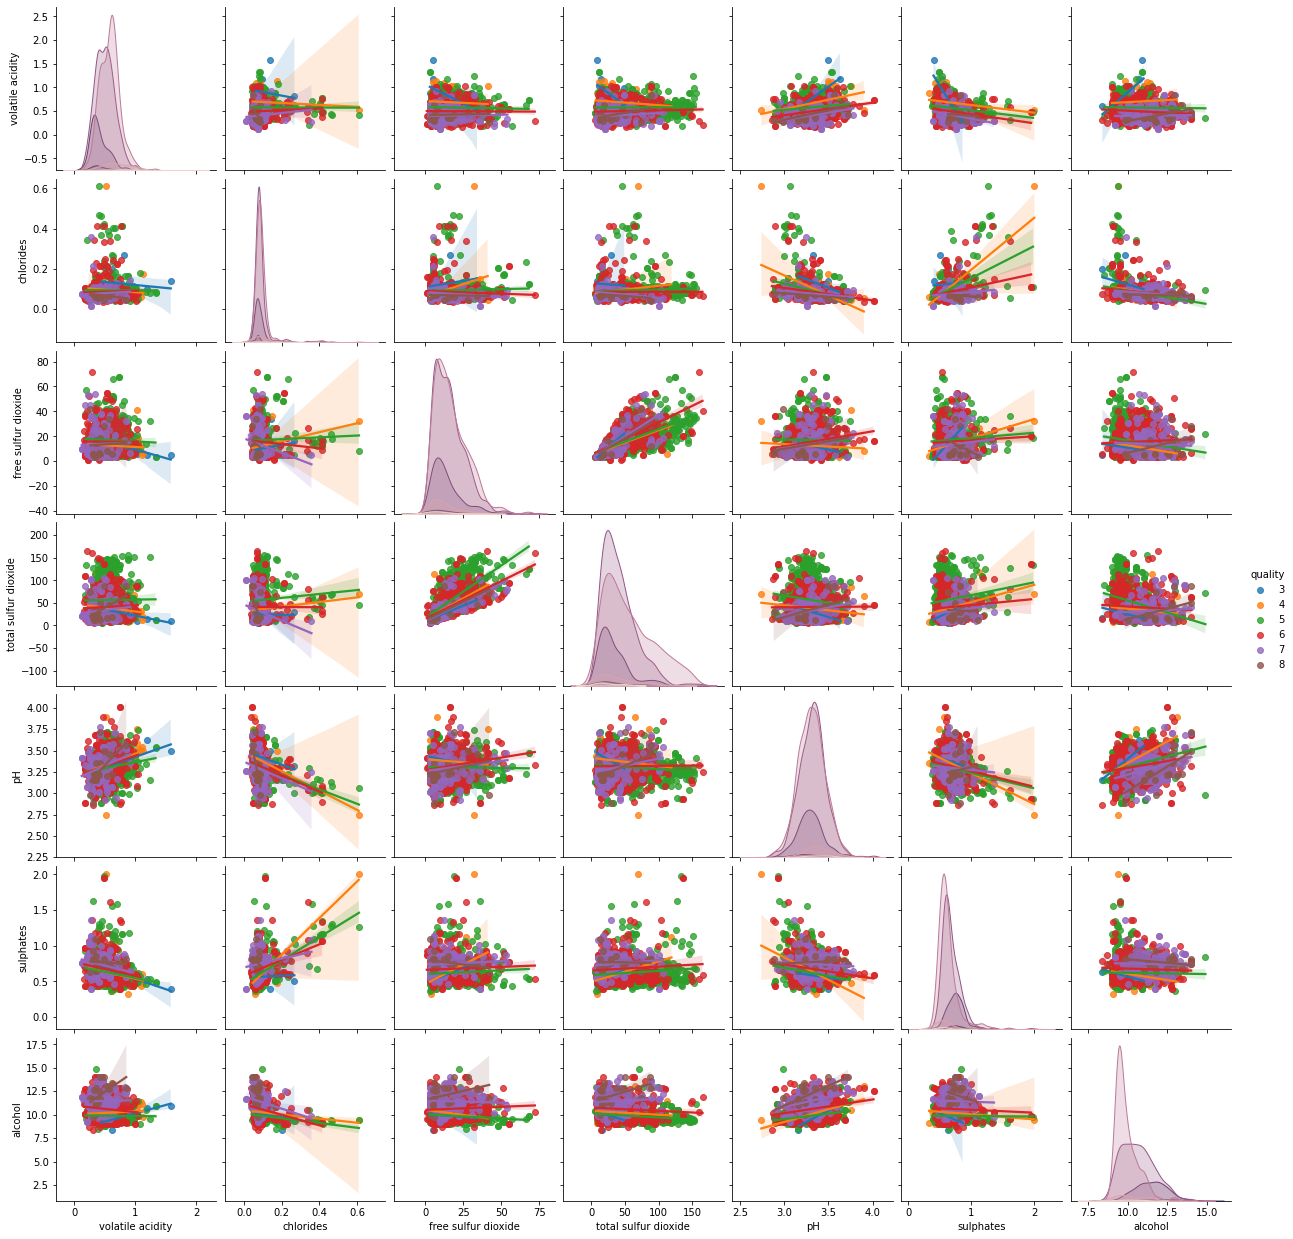

In [34]:
# Produce another pair plot for significant variables only
sig_cols.append("quality")
sns.pairplot(data[sig_cols], kind = "reg", hue = "quality");

## Logistic Regression 

We will perform logistic regression on the same dataset. For this reason we need to binarize the quality variable: if below mean, false, otherwise true

In [35]:
binthresh = np.mean(data["quality"])
binthresh

5.634314339386349

In [36]:
# Add the new column to the dataframe
data["binquality"] = data["quality"] > binthresh
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [37]:
# Drop the last two columns
Xcols = []
for key in data.keys():
    if key not in ["quality", "binquality"]:
        Xcols.append(key)
Xcols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [38]:
# Use list comprehension
bs = []
[bs.append(key) for key in data.keys() if key not in ["quality", "binquality"]]
bs

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [39]:
model = sm.Logit(data["binquality"], data[Xcols])
results = model.fit(method = "newton")
results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                  0.2525
Time:                        03:11:56   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [40]:
# Extract significant variables
results.pvalues < 0.05

fixed acidity           False
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                      False
sulphates                True
alcohol                  True
dtype: bool

In [41]:
sig_logit = list(results.pvalues[results.pvalues < 0.05].keys())
print("Significant predictors from Logistic Regression:")
[print("   " + i) for i in sig_logit];
print( )

print("Significant predictors from Linear Regression:")
[print("   " +i) for i in sig_cols[:-1]];

Significant predictors from Logistic Regression:
   volatile acidity
   citric acid
   chlorides
   free sulfur dioxide
   total sulfur dioxide
   density
   sulphates
   alcohol

Significant predictors from Linear Regression:
   volatile acidity
   chlorides
   free sulfur dioxide
   total sulfur dioxide
   pH
   sulphates
   alcohol


## Bonus: Transform to Gaussian

1 - Create Brownian Noise

2 - Rank Transform

3 - Scale to (-1, 1)

4 - Apply Inverse Hyperbolic Tangent

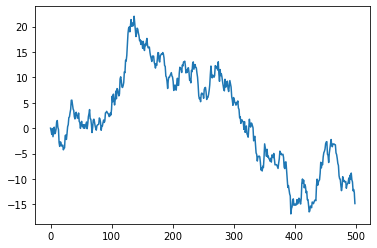

In [42]:
# Generate 500 data points
n = 500
x = np.cumsum(np.random.randn(n))
plt.plot(x);

In [43]:
y = stats.rankdata(x)
y = stats.rankdata(x)/(n+1)
print(np.min(y), np.max(y))

0.001996007984031936 0.998003992015968


In [44]:
# We want the data to range from -1 to +1
y = stats.rankdata(x)/(n+1)*2 - 1
print(np.min(y), np.max(y))

-0.9960079840319361 0.996007984031936


In [45]:
# The same thing in a different way
y = (stats.rankdata(x)/(n+1) - 0.5)*2
print(np.min(y), np.max(y))

-0.9960079840319361 0.996007984031936


In [46]:
# The second step of the algo converting s non-normal distribution to Gaussian
y = np.arctanh(y)

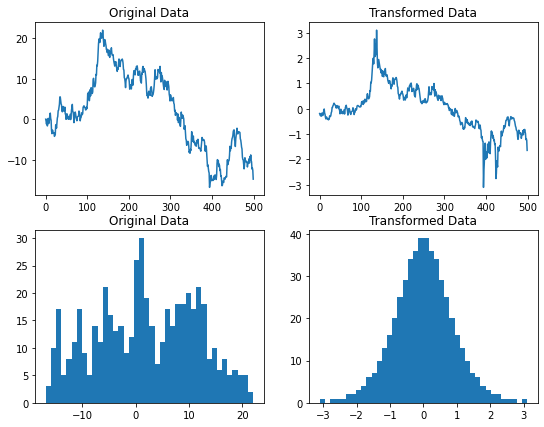

In [47]:
fig, ax = plt.subplots(2,2, figsize = (9,7))
ax[0,0].plot(x)
ax[0,0].set_title("Original Data")
ax[0,1].plot(y)
ax[0,1].set_title("Transformed Data")
ax[1,0].hist(x, bins = 40)
ax[1,0].set_title("Original Data")
ax[1,1].hist(y, bins = 40)
ax[1,1].set_title("Transformed Data")
plt.show()

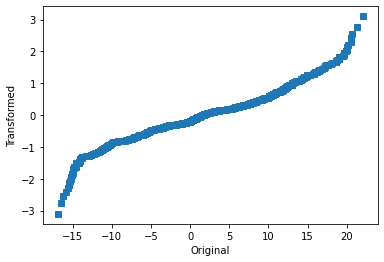

In [48]:
plt.plot(x,y, "s")
plt.xlabel("Original")
plt.ylabel("Transformed")
plt.show()